<a href="https://colab.research.google.com/github/G-Madhuri/iiith_AI-ML_course/blob/main/Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>
**Done by Gottumukkala Madhuri**

In [21]:
# importing libraries and installing the ones not present
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part-1 Features of text
applying machine learning on text( We can't directly use the text as input to our algorithms)

In [22]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content
print("English: ",eng2[:250])
print("French: ",fr2[:250])

English:  Elephants are the largest living land animals. Three living species are currently recognised: the African bush elephant (Loxodonta africana), the African forest elephant (L. cyclotis), and the Asian elephant (Elephas maximus). They are the only survi
French:  Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd'hui à trois espèces réparties en deux genres distincts. L'éléphant de savane d'Afrique et l'éléphant de forêt d'Afrique, autrefois regroupés sou


In [23]:
fr1[:1000]    # contains many special charecters...nedd to clean up a bit

"La Girafe (Giraffa camelopardalis) est une espèce de mammifères ongulés artiodactyles, du groupe des ruminants, vivant dans les savanes africaines et répandue du Tchad jusqu'en Afrique du Sud. Son nom commun vient de l'arabe زرافة, zarāfah, mais l'animal fut anciennement appelé camélopard, du latin camelopardus, contraction de camelus (chameau) en raison du long cou et de pardus (léopard) en raison des taches recouvrant son corps. Après des millions d'années d'évolution, la girafe a acquis une anatomie unique avec un cou particulièrement allongé qui lui permet notamment de brouter haut dans les arbres.\nNeuf populations, se différenciant par leurs robes et formes, ont été décrites par les naturalistes depuis le XIXe siècle parfois comme espèces à part entière, mais généralement considérées comme simples sous-espèces jusqu'au XXIe siècle. Cependant, la taxonomie des girafes est actuellement débattue parmi les scientifiques.\nL'espèce est considérée comme vulnérable par l'UICN : il y av

In [24]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaandindividualspeciescanbedistinguishedbytheirfurcoatpatternssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliv

**frequency of the character n-grams.** N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

In [25]:
# convert a tuple of characters to a string
def tuple2string(tup):
  return ''.join(tup)
# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]
# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

**comparision the histograms of English pages and French pages. **<br>
**Differences:** text frequency,length of whole text...<br>

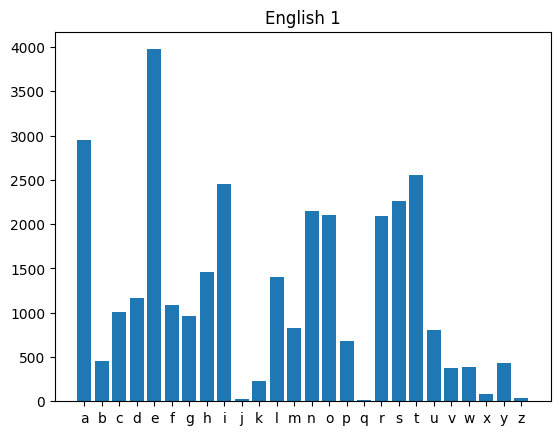

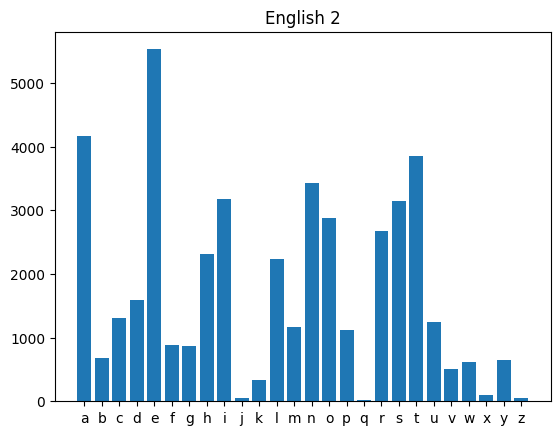

In [26]:
#plot english pages
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

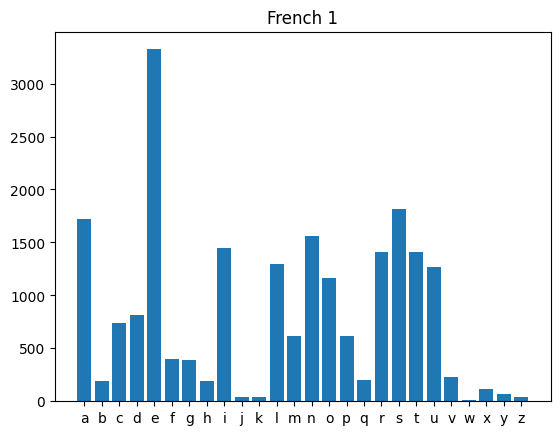

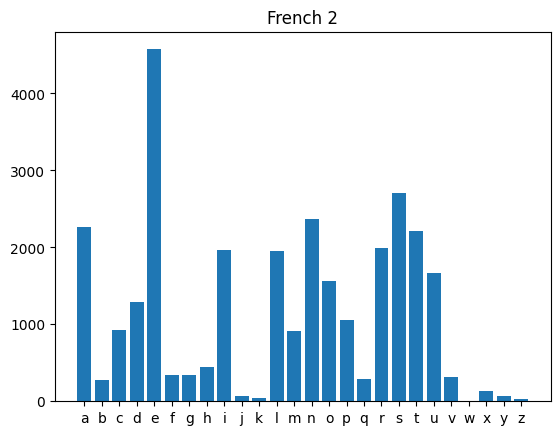

In [27]:
# plot french pages
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_fr1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

 unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

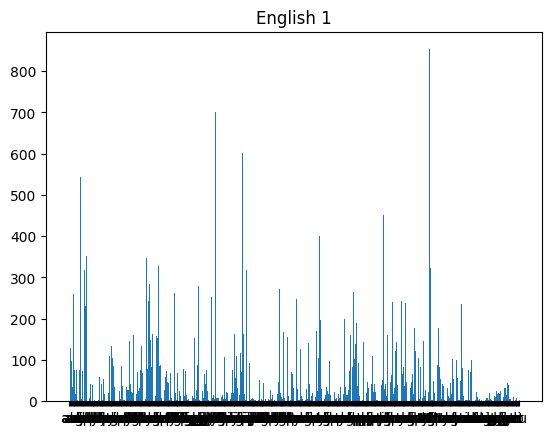

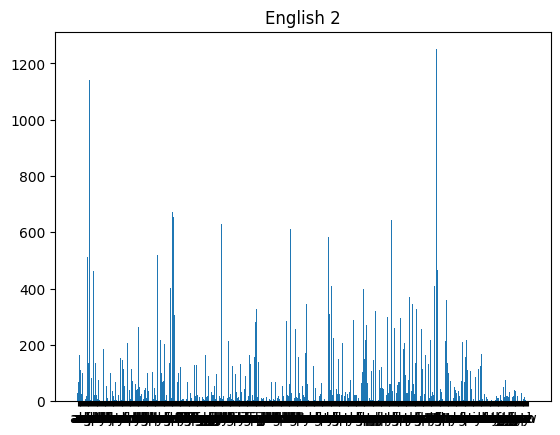

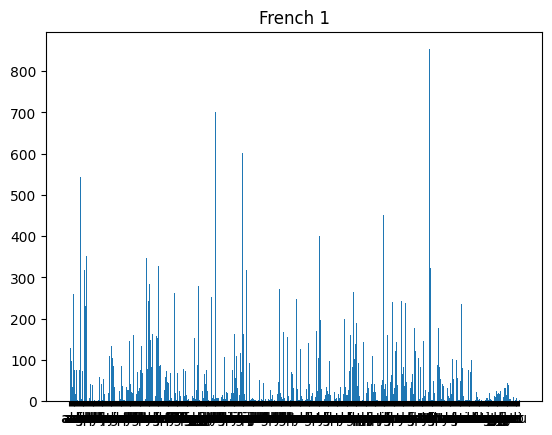

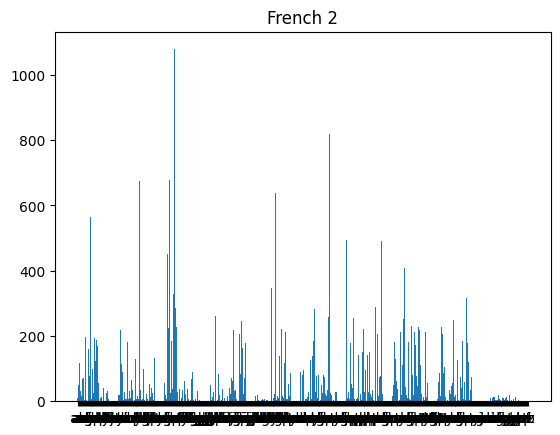

In [28]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

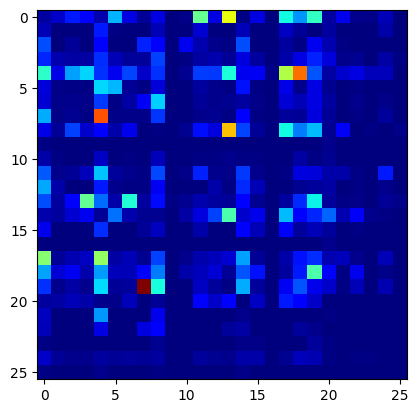

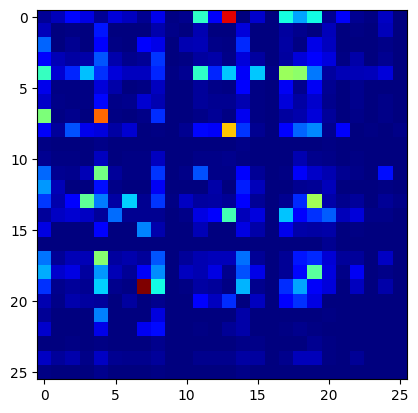

In [29]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

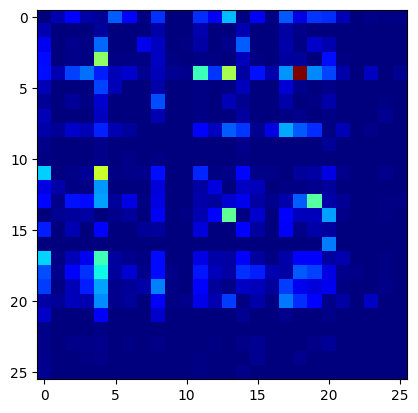

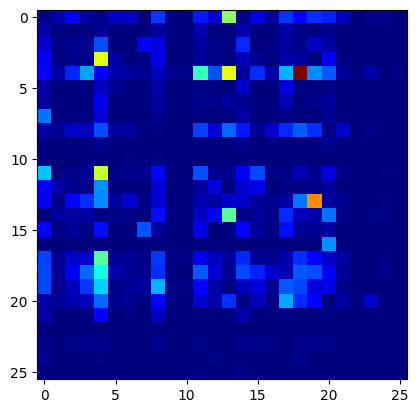

In [30]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

**top 10 ngrams for each text.**

In [31]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [32]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 853.0
('h', 'e') : 700.0
('e', 's') : 674.0
('i', 'n') : 601.0
('a', 'n') : 543.0
('e', 'r') : 483.0
('r', 'e') : 452.0
('r', 'a') : 439.0
('a', 'l') : 406.0
('n', 'd') : 401.0

English 2:
('t', 'h') : 1250.0
('a', 'n') : 1140.0
('h', 'e') : 1000.0
('i', 'n') : 878.0
('n', 't') : 679.0
('e', 'r') : 673.0
('e', 's') : 653.0
('r', 'e') : 644.0
('h', 'a') : 628.0
('l', 'e') : 613.0

French 1:
('e', 's') : 791.0
('l', 'e') : 472.0
('e', 'n') : 438.0
('d', 'e') : 416.0
('o', 'n') : 370.0
('n', 't') : 359.0
('r', 'e') : 337.0
('e', 'l') : 335.0
('s', 'e') : 291.0
('r', 'a') : 265.0

French 2:
('e', 's') : 1078.0
('n', 't') : 819.0
('e', 'n') : 679.0
('d', 'e') : 675.0
('l', 'e') : 638.0
('a', 'n') : 564.0
('o', 'n') : 494.0
('r', 'e') : 490.0
('e', 'l') : 452.0
('s', 'e') : 408.0


bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.<br>Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).

# Other ways exploration

**Trying with other languages way-1**

Retrieve content: 

English:  The Bengal tiger is a population of the Panthera tigris tigris subspecies and the nominate tiger subspecies. It ranks among the biggest wild cats alive today. It is estimated to have been present in the Indian subcontinent since the Late Pleistocene 
Spanish:  El tigre de Bengala  (Panthera tigris tigris), también conocido como tigre de Bengala real o tigre indio, es una subespecie de tigre que habita en la India, Nepal, Bangladés, Bután, Birmania y Tíbet. Es la subespecie más numerosa y conocida de tigre,

After cleanup: 

English:  thebengaltigerisapopulationofthepantheratigristigrissubspeciesandthenominatetigersubspeciesitranksamongthebiggestwildcatsalivetodayitisestimatedtohavebeenpresentintheindiansubcontinentsincethelatepleistoceneforabouttoyearsitshistoricalrangecoveredthe
Spanish:  eltigredebengalapantheratigristigristambinconocidocomotigredebengalarealotigreindioesunasubespeciedetigrequehabitaenlaindianepalbangladsbutnbirmaniaytbeteslasubespeciems

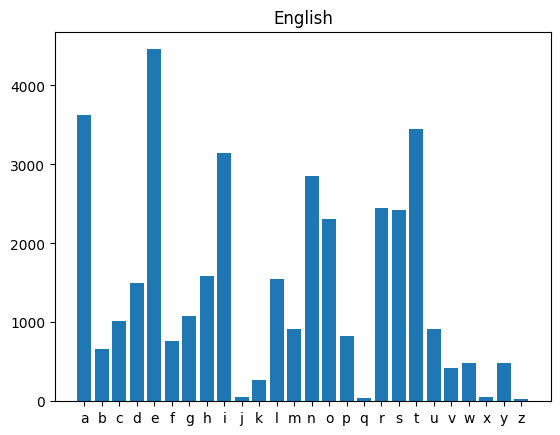

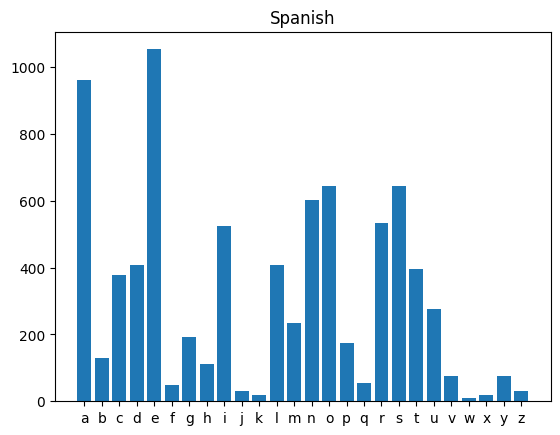


Bigrams: 



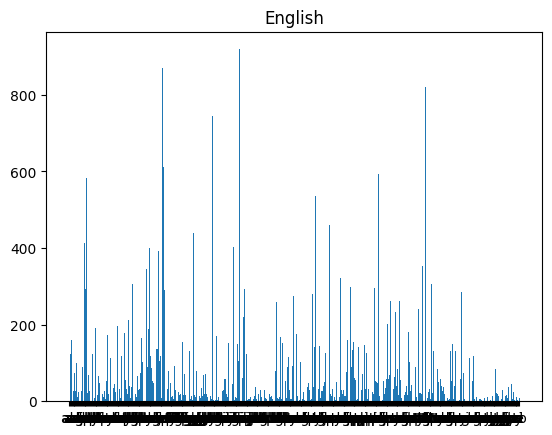

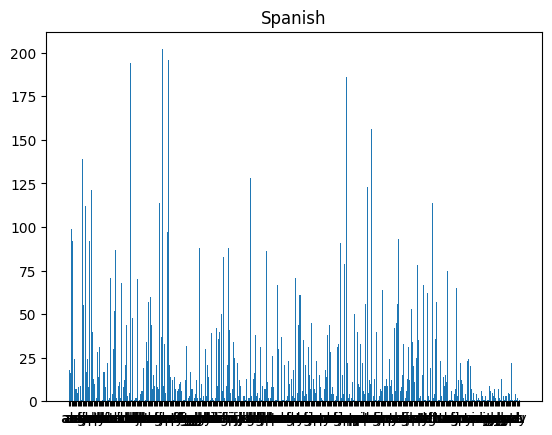

In [34]:
import wikipedia

# Set the topic
topic = 'Bengal Tiger'

# Set language to English and retrieve content
wikipedia.set_lang('en')
eng = wikipedia.page(topic).content

# Set language to Spanish and retrieve content
wikipedia.set_lang('es')
spa = wikipedia.page(topic).content

print("Retrieve content: \n")
print("English: ", eng[:250])
print("Spanish: ", spa[:250])

#cleanup
def cleanup(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '', text)
  return text
eng = cleanup(eng)
spa = cleanup(spa)
print("\nAfter cleanup: \n")
print("English: ", eng[:250])
print("Spanish: ", spa[:250])

#plot unigrams
print("\nUnigrams: \n")
unigram_eng = Counter(ngrams(eng,1))
plothistogram(unigram_eng)
plt.title('English')
plt.show()

unigram_spa = Counter(ngrams(spa,1))
plothistogram(unigram_spa)
plt.title('Spanish')
plt.show()

#plot bigrams
print("\nBigrams: \n")
bigram_eng = Counter(ngrams(eng,2))
plothistogram(bigram_eng)
plt.title('English')
plt.show()

bigram_spa = Counter(ngrams(spa,2))
plothistogram(bigram_spa)
plt.title('Spanish')
plt.show()

**Trying with other languages way-2**


Bihistogram: 



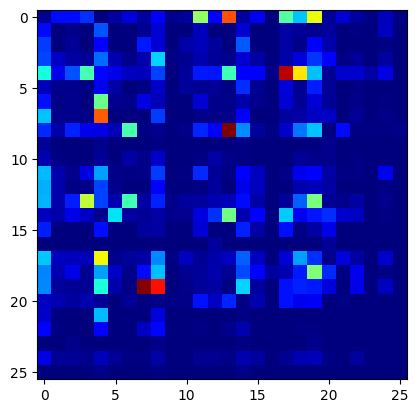

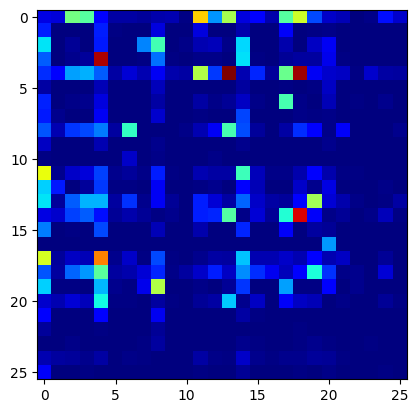


Display frequency in order: 


English:
('i', 'n') : 919.0
('t', 'h') : 913.0
('e', 'r') : 869.0
('t', 'i') : 820.0
('a', 'n') : 755.0
('h', 'e') : 745.0
('e', 's') : 611.0
('r', 'e') : 594.0
('a', 't') : 584.0
('n', 'd') : 535.0

Spanish:
('e', 'n') : 202.0
('e', 's') : 196.0
('d', 'e') : 194.0
('o', 's') : 186.0
('r', 'e') : 156.0
('a', 'l') : 139.0
('l', 'a') : 128.0
('r', 'a') : 123.0
('a', 's') : 121.0
('t', 'i') : 114.0


In [35]:
#plot histogram
print("\nBihistogram: \n")
bieng = plotbihistogram(bigram_eng)
plt.show()
bispa = plotbihistogram(bigram_spa)
plt.show()

#frequency
print("\nDisplay frequency in order: \n")
print('\nEnglish:')
ShowTopN(bieng)
print('\nSpanish:')
ShowTopN(bispa)

**use text from another source than Wikipedia way-01 using encyclopedia website**

Retrieve content: 

English:  tiger (mammal)tiger, (Panthera tigris), largest member of the cat family (Felidae), rivaled only by the lion (Panthera leo) in strength and ferocity; it is a famous apex predator (meaning without a natural predator or enemy). The tiger is endangered 

After cleanup: 

English:  tigermammaltigerpantheratigrislargestmemberofthecatfamilyfelidaerivaledonlybythelionpantheraleoinstrengthandferocityitisafamousapexpredatormeaningwithoutanaturalpredatororenemythetigerisendangeredthroughoutitsrangewhichstretchesfromtherussianfareast

Unigrams: 



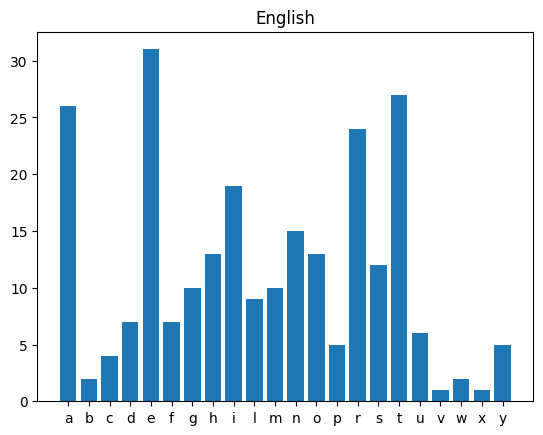


Bigrams: 



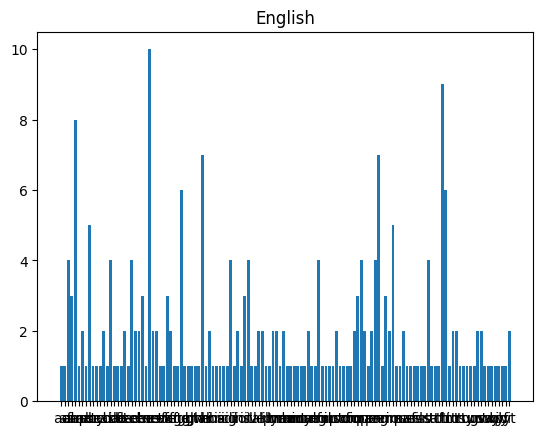

In [36]:
import requests
from bs4 import BeautifulSoup

# Set the base URL
base_url = 'https://www.britannica.com/search?query='

# Set the topic
topic = 'Tiger'

# Function to retrieve content from the encyclopedia API
def get_encyclopedia_content(topic):
    response = requests.get(f"{base_url}{topic}")
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        elements = soup.find_all(class_="mb-45 RESULT-1")
        text = [element.get_text(strip=True) for element in elements]
        return ''.join(text)
    else:
        return None

# Retrieve content
eng = get_encyclopedia_content(topic)
c=eng
print("Retrieve content: \n")
print("English: ", eng[:250])

#cleanup
def cleanup(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '', text)
  return text
eng = cleanup(eng)
print("\nAfter cleanup: \n")
print("English: ", eng[:500])

#plot unigrams
print("\nUnigrams: \n")
unigram_eng = Counter(ngrams(eng,1))
plothistogram(unigram_eng)
plt.title('English')
plt.show()

#plot bigrams
print("\nBigrams: \n")
bigram_eng = Counter(ngrams(eng,2))
plothistogram(bigram_eng)
plt.title('English')
plt.show()

**use text from another source than Wikipedia way-02 using encyclopedia website**


Bihistogram: 



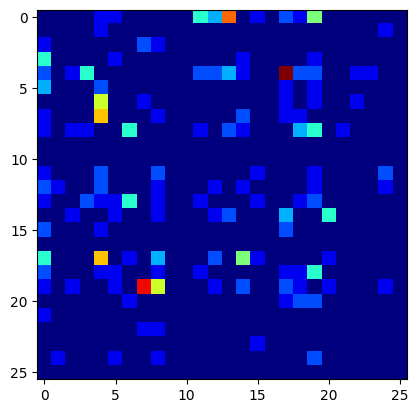


Display frequency in order: 


English:
('e', 'r') : 10.0
('t', 'h') : 9.0
('a', 'n') : 8.0
('h', 'e') : 7.0
('r', 'e') : 7.0
('t', 'i') : 6.0
('g', 'e') : 6.0
('r', 'o') : 5.0
('a', 't') : 5.0
('s', 't') : 4.0


In [37]:
#plot histogram
print("\nBihistogram: \n")
bieng = plotbihistogram(bigram_eng)
plt.show()

#frequency
print("\nDisplay frequency in order: \n")
print('\nEnglish:')
ShowTopN(bieng)

**use and visualize trigrams and higher n-grams?**


Trigrams: 



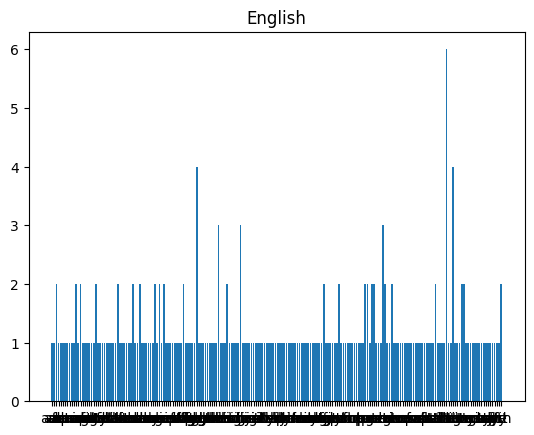

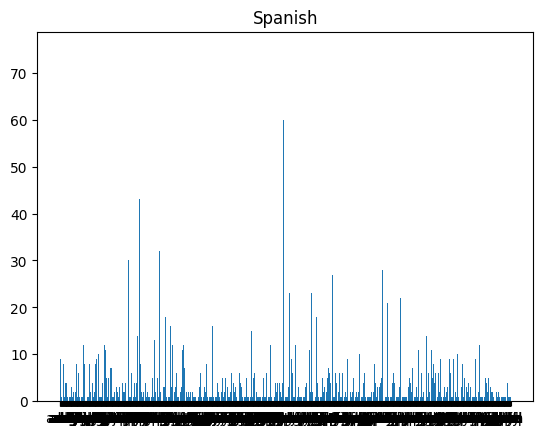

In [38]:
print("\nTrigrams: \n")
bigram_eng = Counter(ngrams(eng,3))
plothistogram(bigram_eng)
plt.title('English')
plt.show()

bigram_spa = Counter(ngrams(spa,3))
plothistogram(bigram_spa)
plt.title('Spanish')
plt.show()


ngrams: 

Enter n: 5


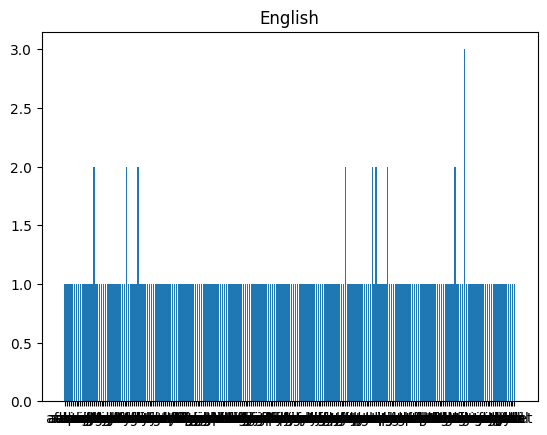

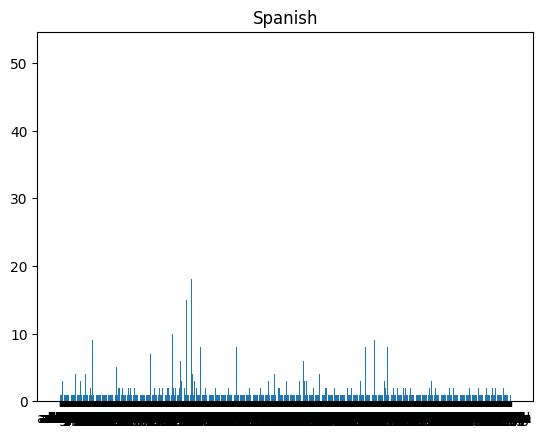

In [39]:
print("\nngrams: \n")
x=int(input("Enter n: "))

bigram_eng = Counter(ngrams(eng,x))
plothistogram(bigram_eng)
plt.title('English')
plt.show()

bigram_spa = Counter(ngrams(spa,x))
plothistogram(bigram_spa)
plt.title('Spanish')
plt.show()

# Part 2: Written numbers

use a subset of the MNIST dataset. Each input character is represented in a 28*28 array.see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset<br>
Extract a subset of the data for our experiment<br>
visualize a few images<br>
start with a simple feature: the sum of all pixels and see how good this feature is<br>
visualize how good this feature is<br>

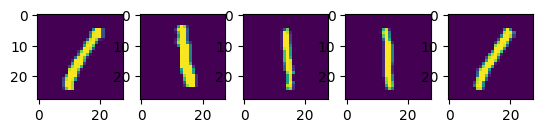

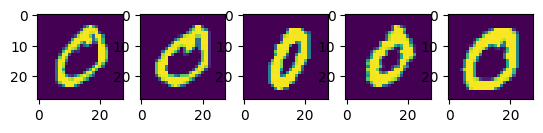

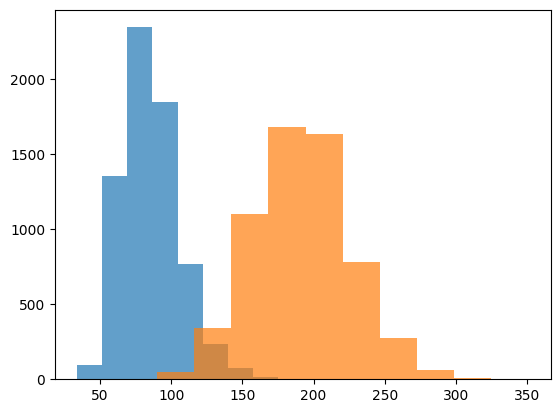

In [40]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#Extract a subset of the data for our experiment
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

# visualize a few images
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

#start with a simple feature: the sum of all pixels and see how good this feature is
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

#visualize how good this feature is
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

this above feature separates the two classes quite well.

look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [41]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

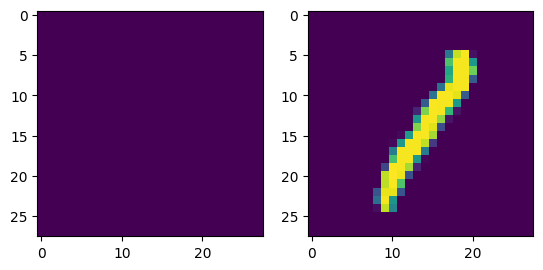

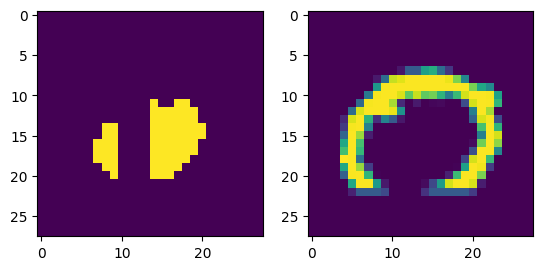

In [42]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

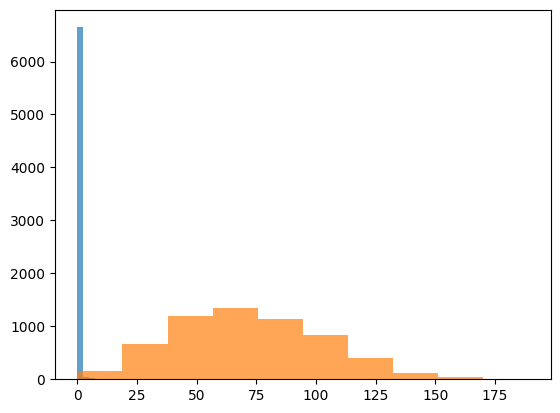

In [43]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.

try the number of pixels in the 'hull' or the number with the holes filled in:

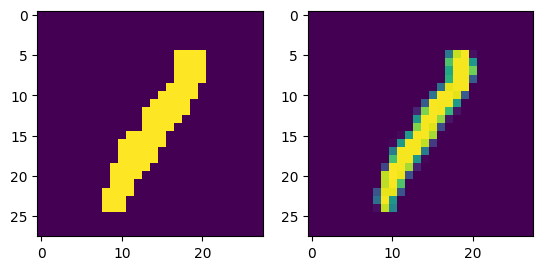

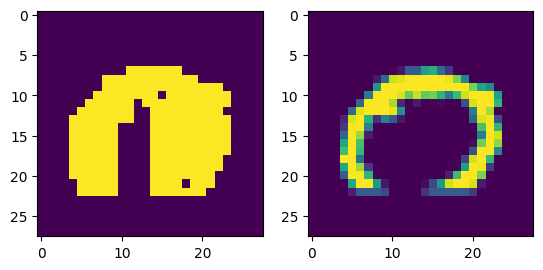

In [44]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

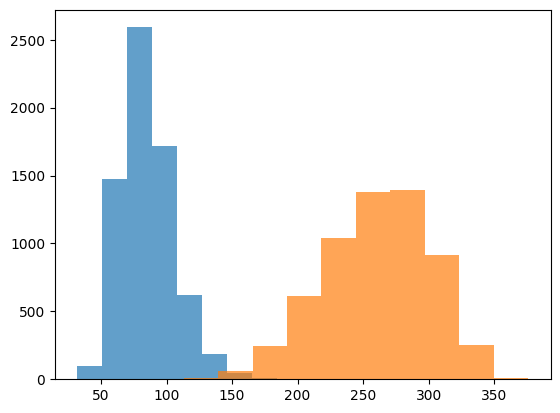

In [45]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

try one more feature, where we look at the number of boundary pixels in each image.

In [46]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

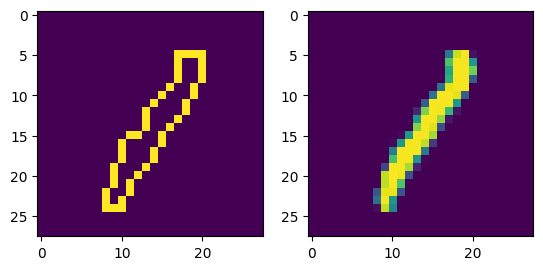

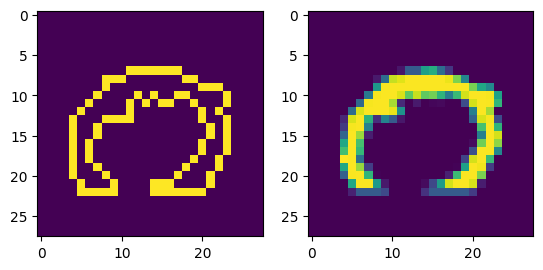

In [47]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

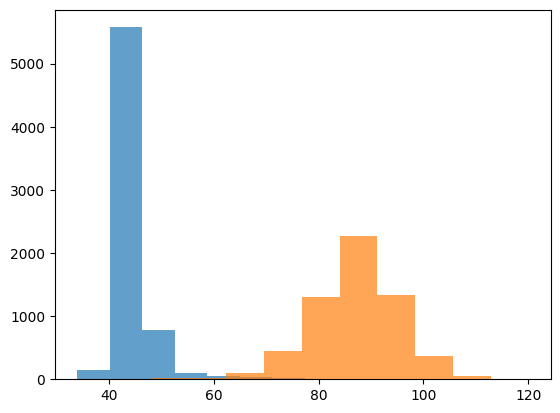

In [48]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

plot two features together

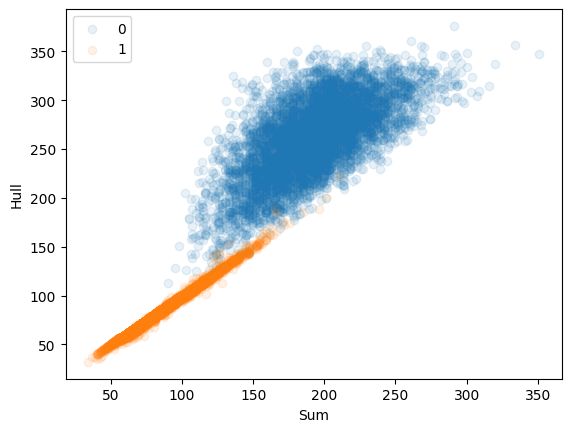

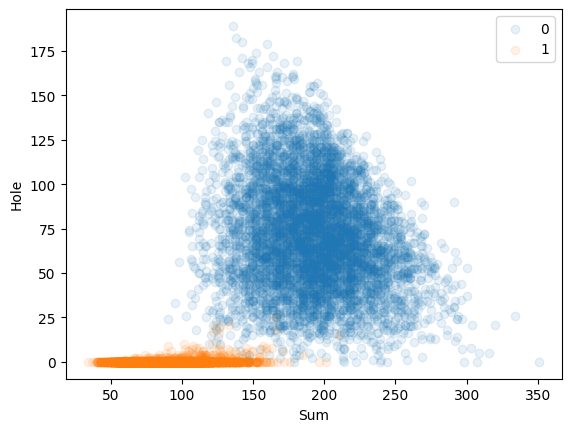

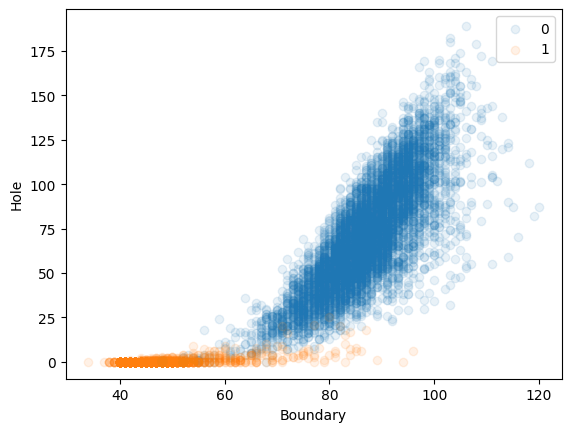

In [49]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

plotting 3 features together.

In [50]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

1. Which is the best combination of features?
<br>**Ans:**(Sum, Boundary)

**Reason:**
<br>**Sum**: Captures overall intensity and presence of pixels, providing information about how filled the digit is.
<br>**Boundary**: Highlights the structure and shape of the digit, helping to distinguish between the two classes effectively.<br>
This combination balances both intensity and structural features, often yielding good classification performance.

2.How would you test or visualize four or more features?
<br>**Ans:**
<br>Pairwise Plots: Use seaborn.pairplot to visualize all feature combinations in 2D.<br>
PCA: Reduce dimensions to 2D or 3D using PCA for a clear visual representation.<br>
3D Scatter Plots: Plot three features in 3D and use color/size for the fourth feature.<br>
Parallel Coordinates: Visualize high-dimensional data with parallel coordinates plots.

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame with features
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['Hole', 'Sum', 'Boundary']])

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Class'].map({'class 0': 0, 'class 1': 1}), alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Features')
plt.show()


3.Can you come up with your own features?<br>
**Ans:**
<br>Aspect Ratio: The ratio of the height to the width of the bounding box around the digit. This can help differentiate between digits that have distinct shapes (e.g., '1' vs. '0').<br>Pixel Density: The ratio of non-zero pixels to the total number of pixels. This indicates how filled the digit is.<br>Edge Count: The number of edges detected in the digit image using edge detection techniques (e.g., Sobel filter). This feature can highlight the complexity of the digit's shape.

4.Will these features work for different classes other than 0 and 1?<br>
Yes, many of these features can be effective for differentiating between a wider range of digit classes (0-9) in the MNIST dataset.<br>
Aspect Ratio: Useful for distinguishing digits with different shapes (e.g., '1' vs. '8').

Pixel Density: Helps differentiate digits based on how filled they are, which varies across classes.

Edge Count: Effective for identifying complexity in shapes; for example, '0' has fewer edges than '8'.

5.What will happen if we take more that two classes at a time?

When including more than two classes:

Increased Complexity: The model must differentiate among more classes, which can lead to overlapping features.<br>
Feature Importance Changes: Some features may be less effective at distinguishing multiple classes.<br>
Class Imbalance: Performance may vary if some classes have fewer samples.
Evaluation Metrics: Use metrics like precision, recall, and F1-score for each class.<br>
Model Selection: Some algorithms handle multi-class problems better than others.
Visualization Challenges: Visualizing results becomes more complex with more classes.<br>
Overall, multi-class classification requires careful consideration of features and model choice.